In [1]:
import matplotlib.pyplot as plt

In [4]:
# model_type = "vgg_A_train"
model_type = "vgg_A_bn_train"
log_file = "../logs/%s.log" % model_type
print("Using log file %s" % log_file)

Using log file ../logs/vgg_A_bn_train.log


In [5]:
training_loss = []
training_top1 = []
training_top5 = []
val_loss = []
val_top1 = []
val_top5 = []

with open(log_file, 'r') as log:
    for line in log:
        if "Iter" in line:
            if "Training" in line:
                parts = line.rstrip('\n').split(",")
                loss = float(parts[1].split(" ")[-1])
                top1 = float(parts[2].split(" ")[-1])
                top5 = float(parts[3].split(" ")[-1])
                training_loss.append(loss)
                training_top1.append(top1)
                training_top5.append(top5)
            elif "Validation" in line:
                parts = line.rstrip('\n').split(",")
                loss = float(parts[1].split(" ")[-1])
                top1 = float(parts[2].split(" ")[-1])
                top5 = float(parts[3].split(" ")[-1])
                val_loss.append(loss)
                val_top1.append(top1)
                val_top5.append(top5)
    
print("Extracted %d iterations of training metrics" % (50 * len(training_loss)))

Extracted 27400 iterations of training metrics


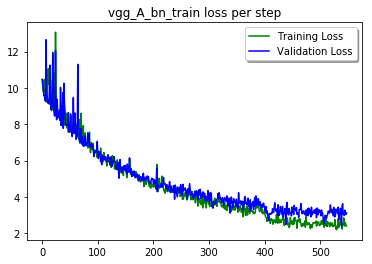

In [6]:
# Plot loss per "step" over time
fig, ax = plt.subplots()
train = ax.plot(range(len(training_loss)), training_loss, 'g', label="Training Loss")
val = ax.plot(range(len(val_loss)), val_loss, 'b', label="Validation Loss")
lines = train + val
labels = list(map(lambda line: line.get_label(), lines))
ax.legend(lines, labels, loc="upper right", shadow=True)
ax.set_title("%s loss per step" % model_type)
plt.show()

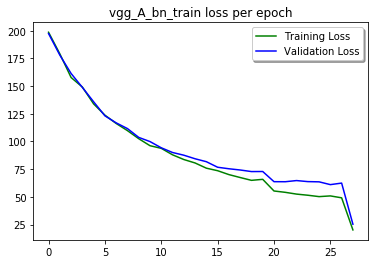

In [7]:
# Plot per-epoch loss over time
import math

training_epoch_loss = []
val_epoch_loss = []
batch_size = 100
train_size = 100000
steps_per_epoch = train_size // batch_size // 50
for i in range(int(math.ceil(len(training_loss) / steps_per_epoch))):
    training_epoch_loss.append(sum(training_loss[i * steps_per_epoch:(i + 1) * steps_per_epoch]))
    val_epoch_loss.append(sum(val_loss[i * steps_per_epoch:(i + 1) * steps_per_epoch]))

fig, ax = plt.subplots()
train = ax.plot(range(len(training_epoch_loss)), training_epoch_loss, 'g', label="Training Loss")
val = ax.plot(range(len(val_epoch_loss)), val_epoch_loss, 'b', label="Validation Loss")
lines = train + val
labels = list(map(lambda line: line.get_label(), lines))
ax.legend(lines, labels, loc="upper right", shadow=True)
ax.set_title("%s loss per epoch" % model_type)
plt.show()

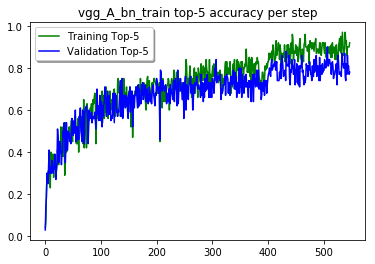

In [8]:
# Plot top-5 over time
fig, ax = plt.subplots()
train = ax.plot(range(len(training_top5)), training_top5, 'g', label="Training Top-5")
val = ax.plot(range(len(val_top5)), val_top5, 'b', label="Validation Top-5")
lines = train + val
labels = list(map(lambda line: line.get_label(), lines))
ax.legend(lines, labels, loc="upper left", shadow=True)
ax.set_title("%s top-5 accuracy per step" % model_type)
plt.show()

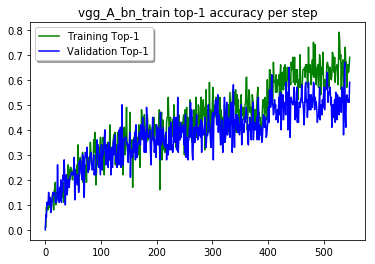

In [9]:
# Plot top-1 over time
fig, ax = plt.subplots()
train = ax.plot(range(len(training_top1)), training_top1, 'g', label="Training Top-1")
val = ax.plot(range(len(val_top1)), val_top1, 'b', label="Validation Top-1")
lines = train + val
labels = list(map(lambda line: line.get_label(), lines))
ax.legend(lines, labels, loc="upper left", shadow=True)
ax.set_title("%s top-1 accuracy per step" % model_type)
plt.show()